In [1]:
import igraph as ig
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sufix = '-v3'
RAW_PATH = '../examples/logs/phylo%s/DiseasePhyloReports.tsv'%sufix

In [3]:
raw_data = pd.read_csv(RAW_PATH, sep = "\t|,", engine='python').dropna().reset_index()

In [4]:
raw_data

,index,step,agentId,[regionId,diseaseStatus,diseaseSeq,time,location,checkin,Reported,Sampled,Sequenced]
0,3,0,3,[1,Infectious,3-1,2019-07-01T00:00:00.000,POINT (743567.264467578 3739443.3606160413),AtHome,False,False,false]
1,683,0,683,[4,Infectious,683-1,2019-07-01T00:00:00.000,POINT (742309.4273669762 3739399.1945451307),AtHome,True,False,false]
2,1581,0,1581,[9,Infectious,1581-1,2019-07-01T00:00:00.000,POINT (742946.0049971151 3738112.998143424),AtHome,True,False,false]
3,2279,0,2279,[12,Infectious,2279-1,2019-07-01T00:00:00.000,POINT (741687.4445962725 3737266.9859377076),AtHome,True,False,false]
4,3148,0,3148,[17,Infectious,3148-1,2019-07-01T00:00:00.000,POINT (741013.3084959803 3735908.118667674),AtHome,False,False,false]
...,...,...,...,...,...,...,...,...,...,...,...,...
8867,18310,17011,1330,[8,Infectious,3148-1.4819-1.3230-1.1696-1.1306-1.2870-1.1439...,2019-08-29T01:35:00.000,POINT (742955.2486709832 3738433.125468897),AtHome,True,False,false]
8868,18315,17083,3045,[17,Exposed,3148-1.4097-1.3903-1.3388-1.3328-1.2377-1.2233...,2019-08-29T07:35:00.000,POINT (741013.7564819002 3736143.403259275),AtWork,False,False,false]
8869,18317,17087,2642,[15,Infectious,1581-1.4945-1.3189-1.4380-1.3506-1.1610-1.522-...,2019-08-29T07:55:00.000,POINT (740918.1460688398 3737470.920130511),AtWork,True,False,false]
8870,18318,17089,1716,[9,Exposed,3148-1.4097-1.4091-1.3989-1.1590-1.1688-1.1515...,2019-08-29T08:05:00.000,POINT (742494.5370012727 3738257.6891743136),AtWork,False,False,false]


In [5]:
full_seq_str_list = raw_data['diseaseSeq']

In [6]:
full_seq_list=[]
maxSeqId = 0
unique_point = set()
ifSecondEx = False
for seq_str in full_seq_str_list:
    if 'null' in seq_str:
        seq_str = seq_str.replace('null','')
    if '-2' in seq_str:
        ifSecondEx = True
    seq_str = seq_str.split('.')
    full_seq_list.append(seq_str)
    unique_point = unique_point.union(set(seq_str))
    if len(seq_str) > len(full_seq_list[maxSeqId]):
        maxSeqId = len(full_seq_list)-1
full_seq_list[maxSeqId]

['3148-1',
 '4097-1',
 '4091-1',
 '3989-1',
 '1590-1',
 '1688-1',
 '1804-1',
 '1647-1',
 '2900-1',
 '2991-1',
 '2733-1',
 '547-1',
 '1587-1']

In [12]:
for seq in full_seq_list:
    if len(seq) == 1:
        print(seq)

['3-1']
['683-1']
['1581-1']
['2279-1']
['3148-1']


In [7]:
edges = set()
for seq in full_seq_list:
    for i in range(len(seq)-1):
        edges.add(seq[i]+'='+seq[i+1])
len(edges)

4437

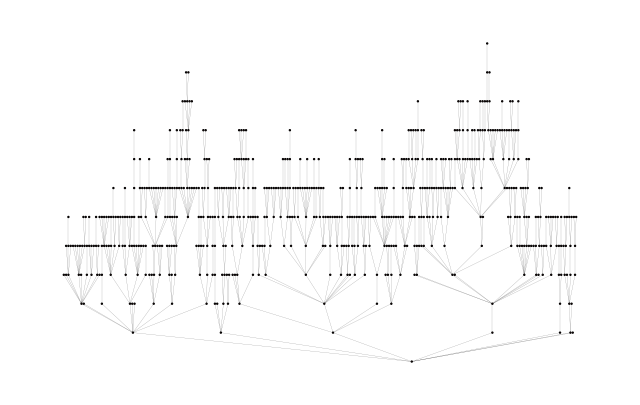

In [15]:
test_edge = set()
test_vet = set()
for seq in full_seq_list:
    if seq[0] != '1581-1':
        continue
    for i in range(len(seq)-1):
        test_edge.add(seq[i]+'='+seq[i+1])
        test_vet.add(seq[i])
        test_vet.add(seq[i+1])        
test_dic = {}
i = 0
for p in test_vet:
    test_dic[p] = i
    i+=1
test_tree = ig.Graph(n = len(test_vet))
for edge in test_edge:
    a,b = edge.split('=')
    test_tree.add_edge(test_dic[a],test_dic[b])


fig, ax = plt.subplots(figsize = (8,5), dpi = 100)
ig.plot(test_tree, target=ax,layout ='reingold_tilford', vertex_size=1, edge_width=0.1)
fig.savefig('sample-v3_1581-1.pdf')

In [11]:
from igraph import Graph
edge = set()
vet = set()
for seq in full_seq_list:
    for i in range(len(seq)-1):
        edge.add(seq[i]+'='+seq[i+1])
        vet.add(seq[i])
        vet.add(seq[i+1])        
dic = {}
i = 0
for p in vet:
    dic[p] = i
    i+=1
tree = ig.Graph(n = len(vet))
for e in edge:
    a,b = e.split('=')
    tree.add_edge(dic[a],dic[b])

fig, ax = plt.subplots(figsize = (200,20), dpi = 100)
ig.plot(tree, target=ax,layout ='reingold_tilford', vertex_size=1, edge_width=0.1)
c
plt.close()

In [87]:
plot_color = ['black'] * len(unique_point)
for i,idx in enumerate(speIdx):
    plot_color[idx] = colors[i]


In [51]:
point_agent_dic = {}
i = 0
for p in unique_point:
    point_agent_dic[p] = i
    i+=1

In [ ]:
test_dic = {}
test_tree = ig.Graph(n = 9)


In [85]:
full_forest = ig.Graph(n = len(unique_point))
for edge in edges:
    a,b = edge.split('=')
    full_forest.add_edge(point_agent_dic[a],point_agent_dic[b])

In [61]:
import matplotlib.pyplot as plt

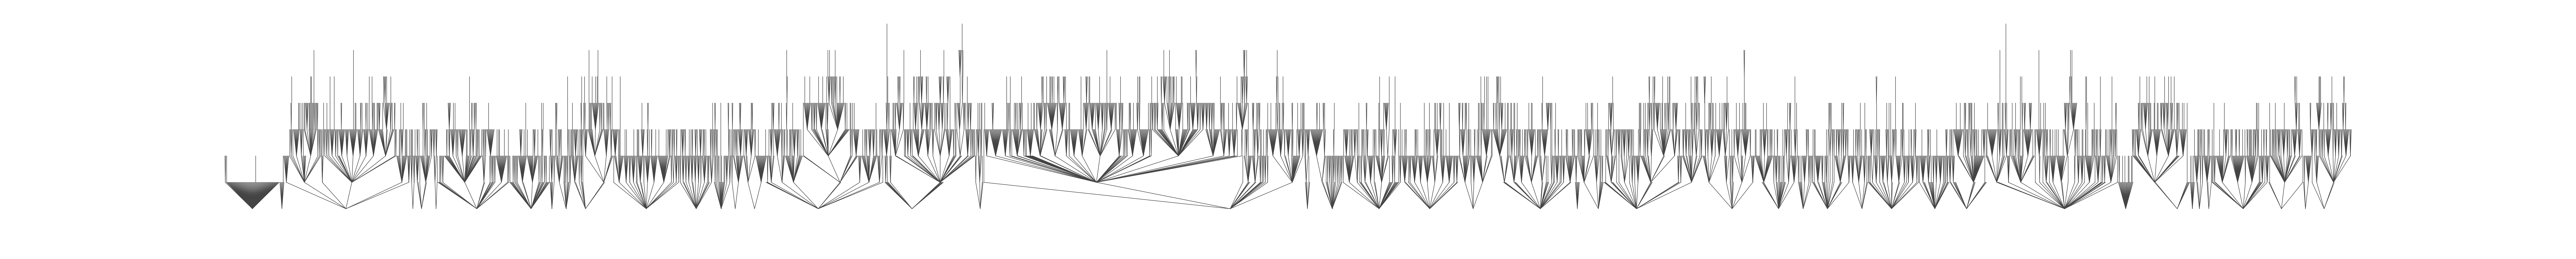

In [67]:
fig, ax = plt.subplots(figsize = (500,20), dpi = 100)
ig.plot(full_forest, target=ax,layout ='reingold_tilford', vertex_size=1)
plt.show()

In [69]:
fig.savefig('sample.pdf')

In [92]:
fig, ax = plt.subplots(figsize = (200,20), dpi = 100)
full_forest.vs['color'] = plot_color
ig.plot(full_forest, target=ax, vertex_size=1, vertex_color = plot_color)
fig.savefig('sample-v2.pdf')
plt.close()